<a href="https://colab.research.google.com/github/qtannn/employee-churn-prediction/blob/main/Employee_Churn_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tananquach","key":"e719432a3c1c13bee97aa5d5b27cbc09"}'}

In [2]:
!pip install kaggle


In [3]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset


Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 2.60MB/s]


In [5]:
import zipfile
with zipfile.ZipFile("ibm-hr-analytics-attrition-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("IBM-HR-Analytics")


In [6]:
import pandas as pd
data = pd.read_csv("/content/IBM-HR-Analytics/WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Perform Exploratory Data Analysis (EDA)

In [8]:
#Viewing data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
#Checking data type and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 1470 records across 35 columns. No missing values

<Axes: xlabel='Attrition', ylabel='count'>

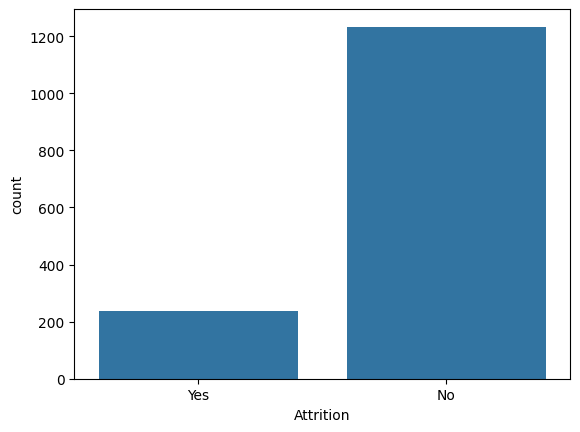

In [10]:
#Check for the distribution of class in 'Attrition' column
sns.countplot(x='Attrition', data=data)

In [11]:
#Statistical summary
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


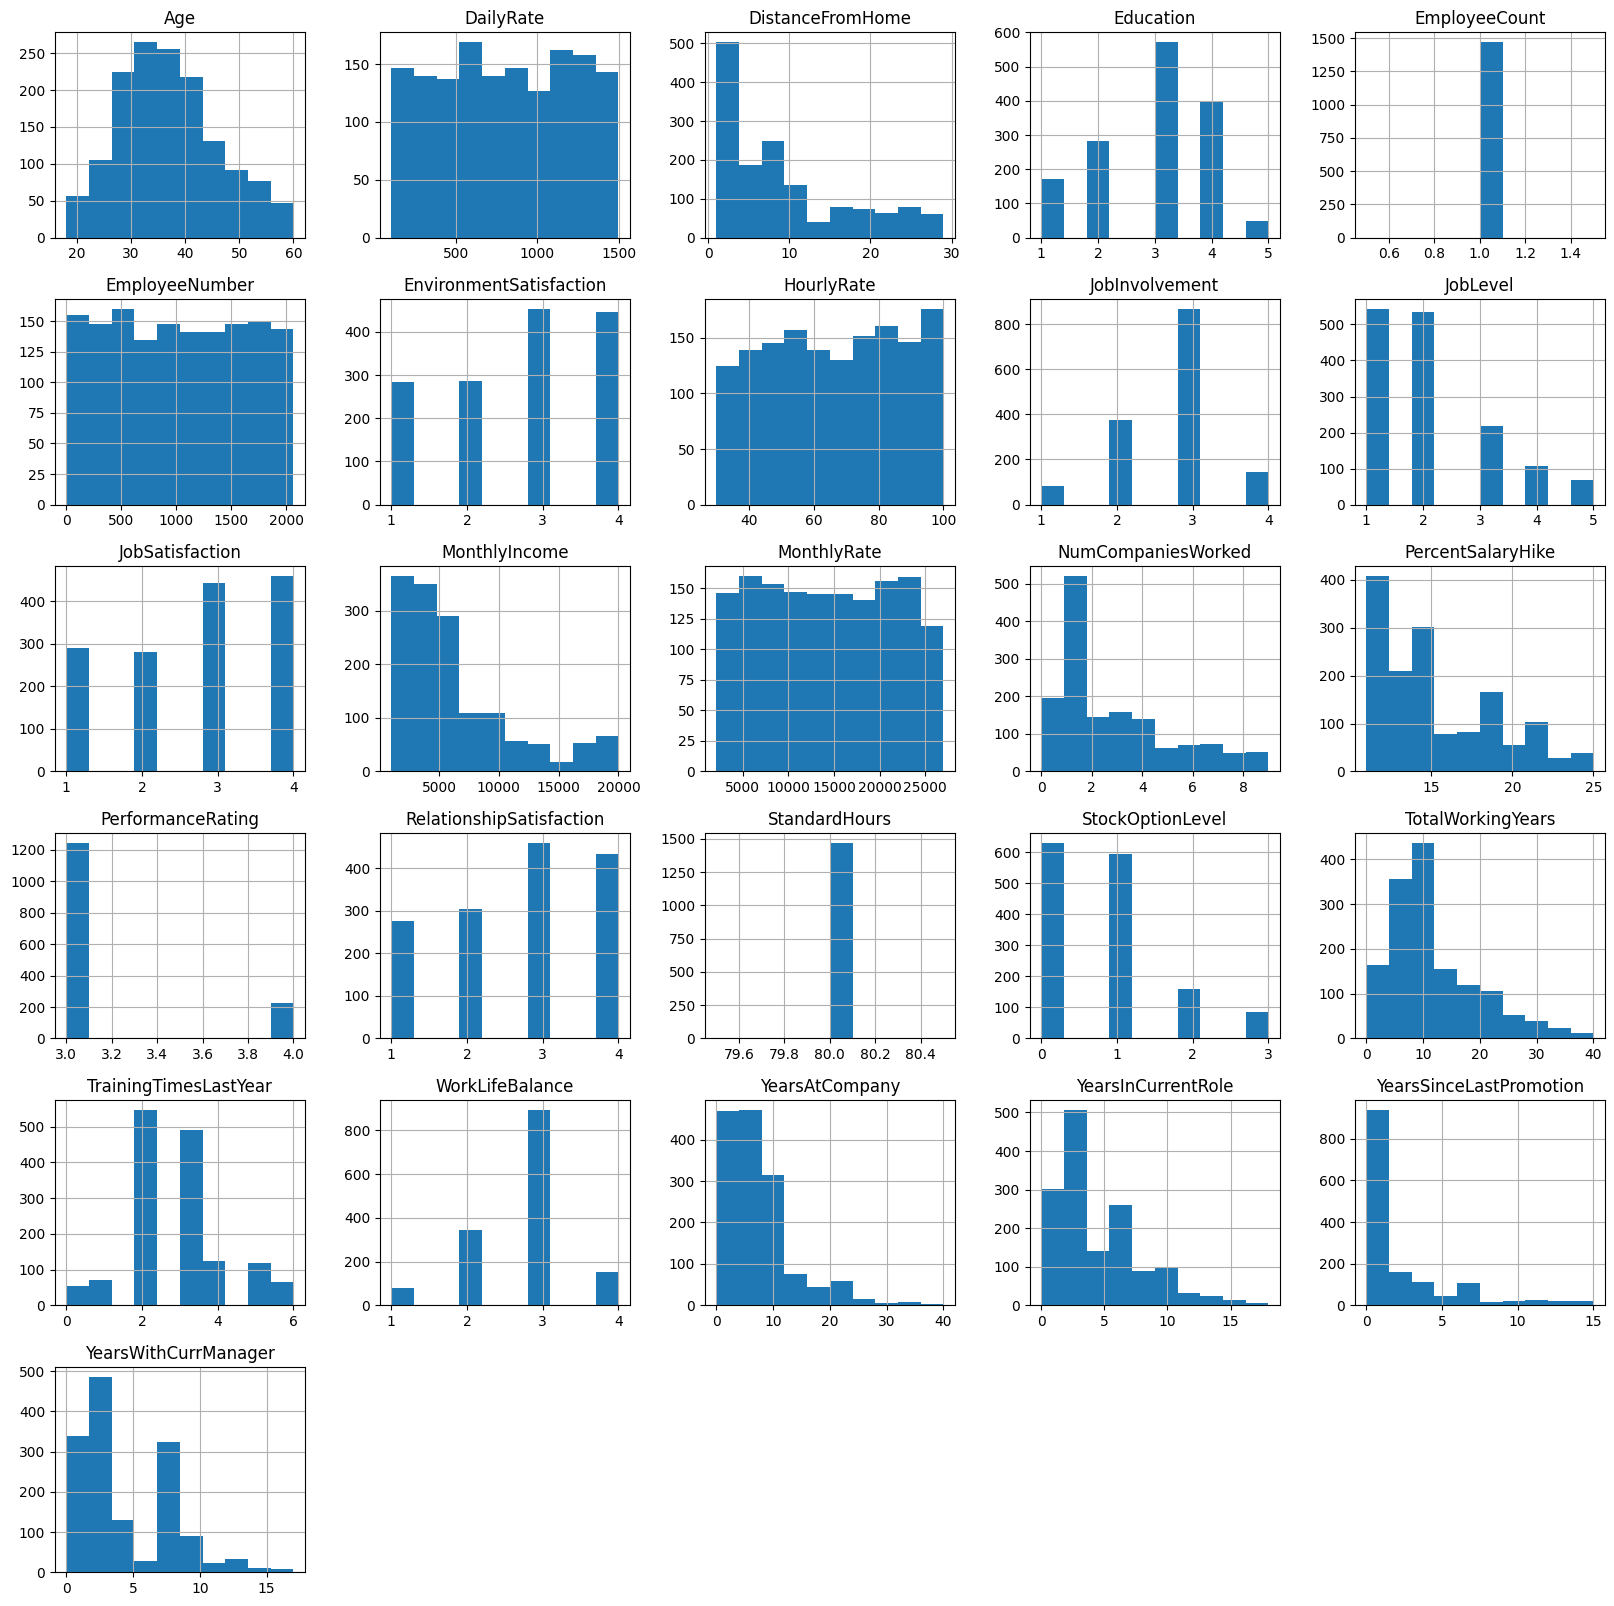

In [12]:
#Checking for distribution
data.hist(figsize=(20,20))
plt.show()


Most of the variables are right-skewed.  
EmployeeCount and StandardHours are likely to be redundant as they are constant values for all employees.

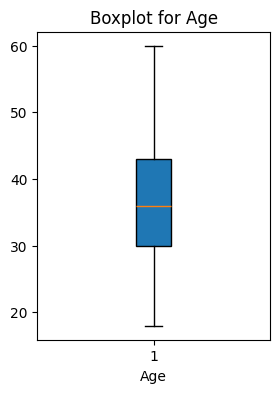

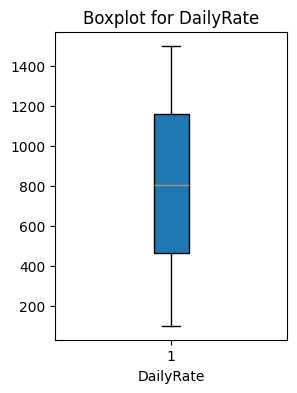

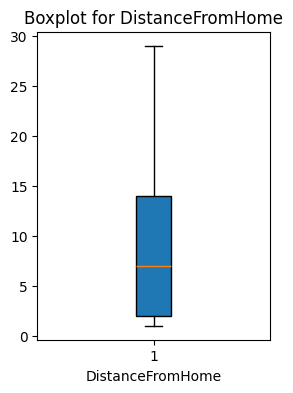

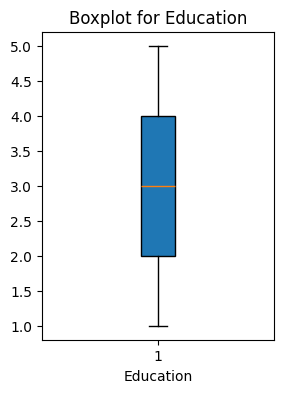

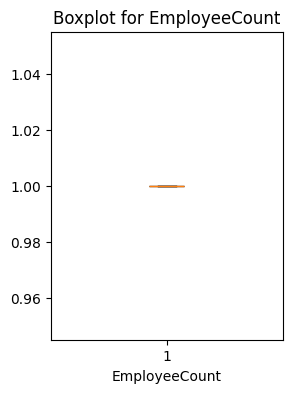

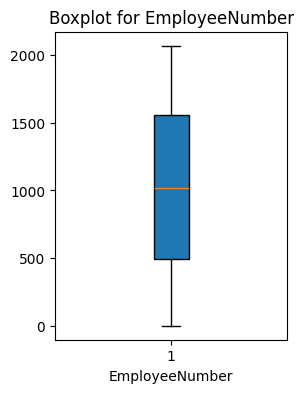

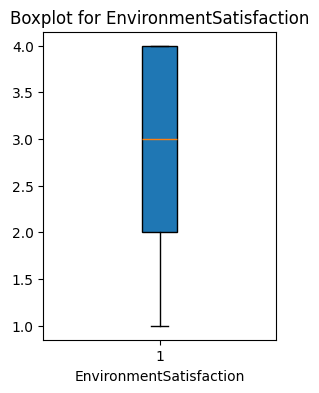

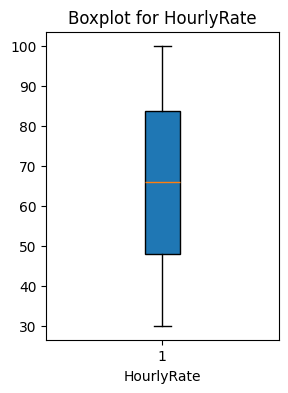

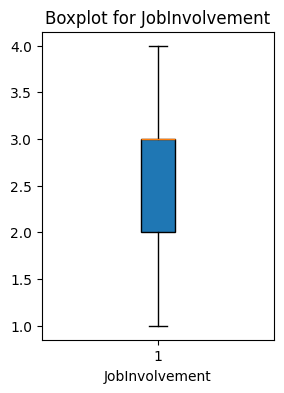

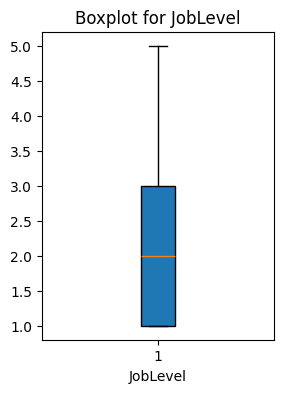

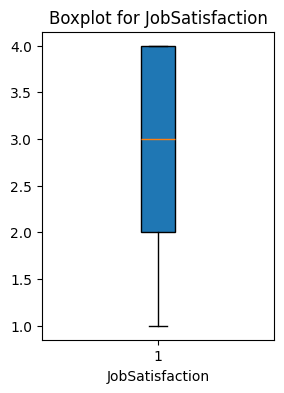

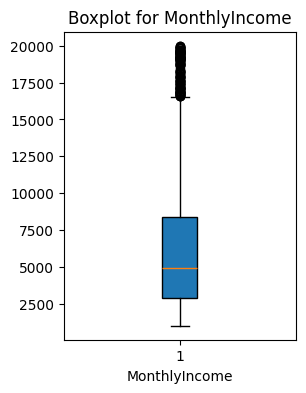

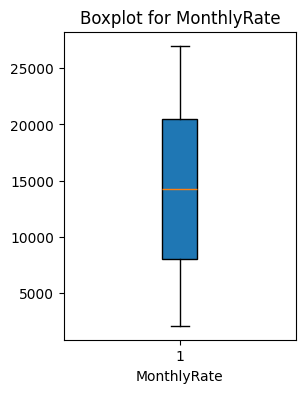

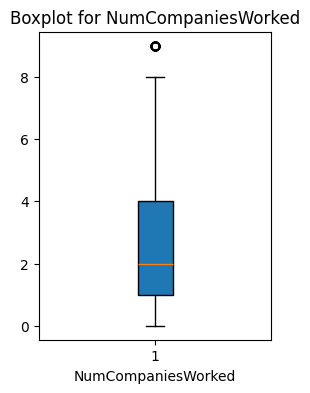

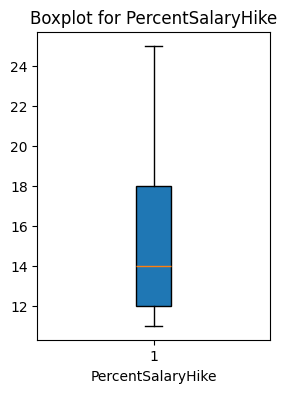

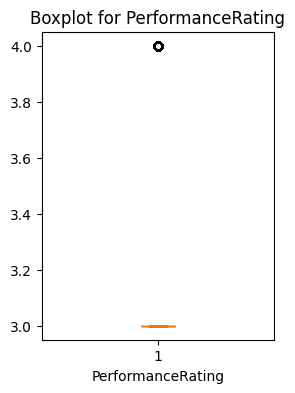

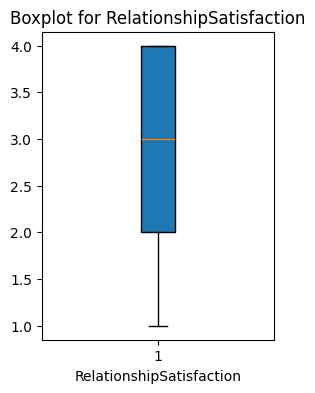

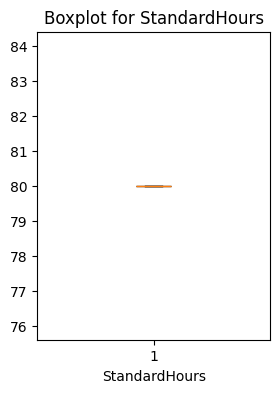

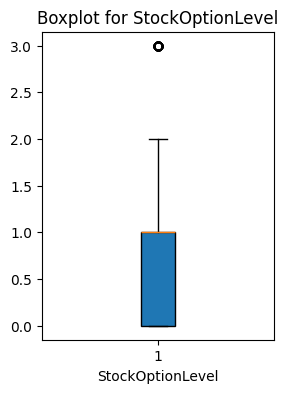

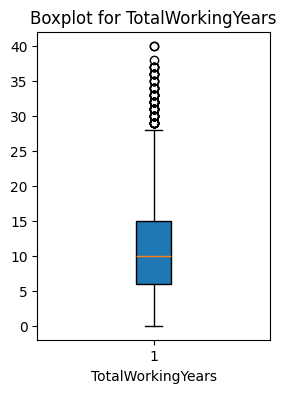

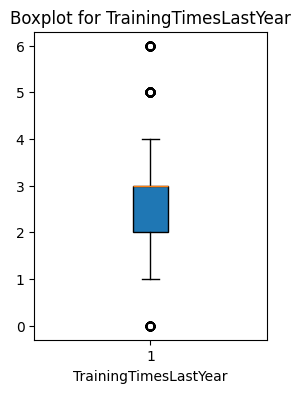

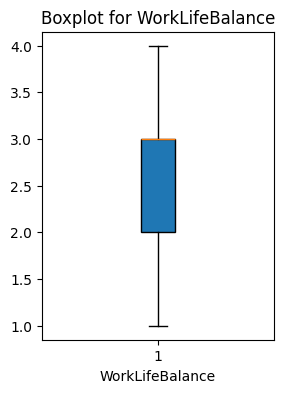

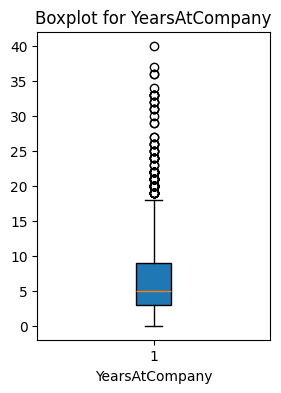

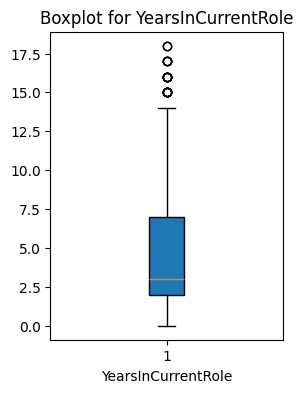

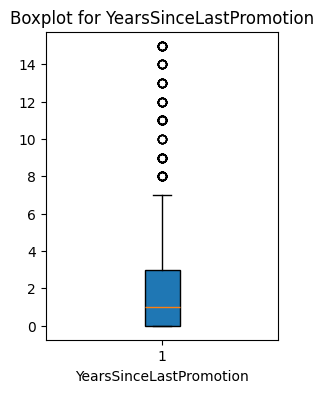

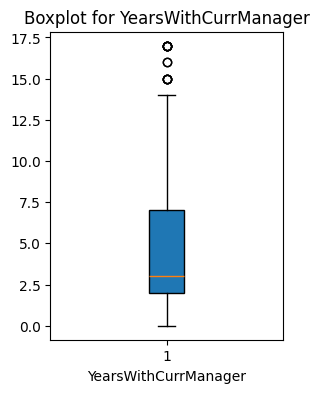

In [13]:
#Checking for outliers
import matplotlib.pyplot as plt

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(3,4))
    plt.boxplot(data[column].dropna(), vert=True, patch_artist=True)
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()



There exists outliers in **MonthlyIncome**, **TotalWorkingYears**, **NoCompaniesWorked**, **PerformanceRating**, **StockOptionLevel**, **TrainingTimesLastYear**, **YearsAtCompany**, **YearsInCurrentRole**, **YearsSinceLastPromotion**, **YearsWithCurrManager**. However, there is no need for handling such outliers as they all reflect natural variations in the data (e.g., higher salaries for CEOs or managers).

In [14]:
#Drop redundant variables
data = data.drop(
    ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

**EmployeeCount, EmployeeNumber, StandardHours, Over18** are removed from the dataset due to redundancy:


*   **EmployeeCount** and **EmployeeNumber** are the unique identifiers which have no use when building the models.
*   **StandardHours** and **Over18** are constant values for all employees.



###Conclusions from EDA
- No missing values, duplicated values, or data errors
- Most variables are right-skewed
- Redundant variables are removed
- Outliers detected but there is no need to handle as their presence reflect natural variations of the dataset in real world.




##Preprocessing

###Encoding

In [15]:
print(data.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [16]:
print(data.shape)
data.head()

(1470, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


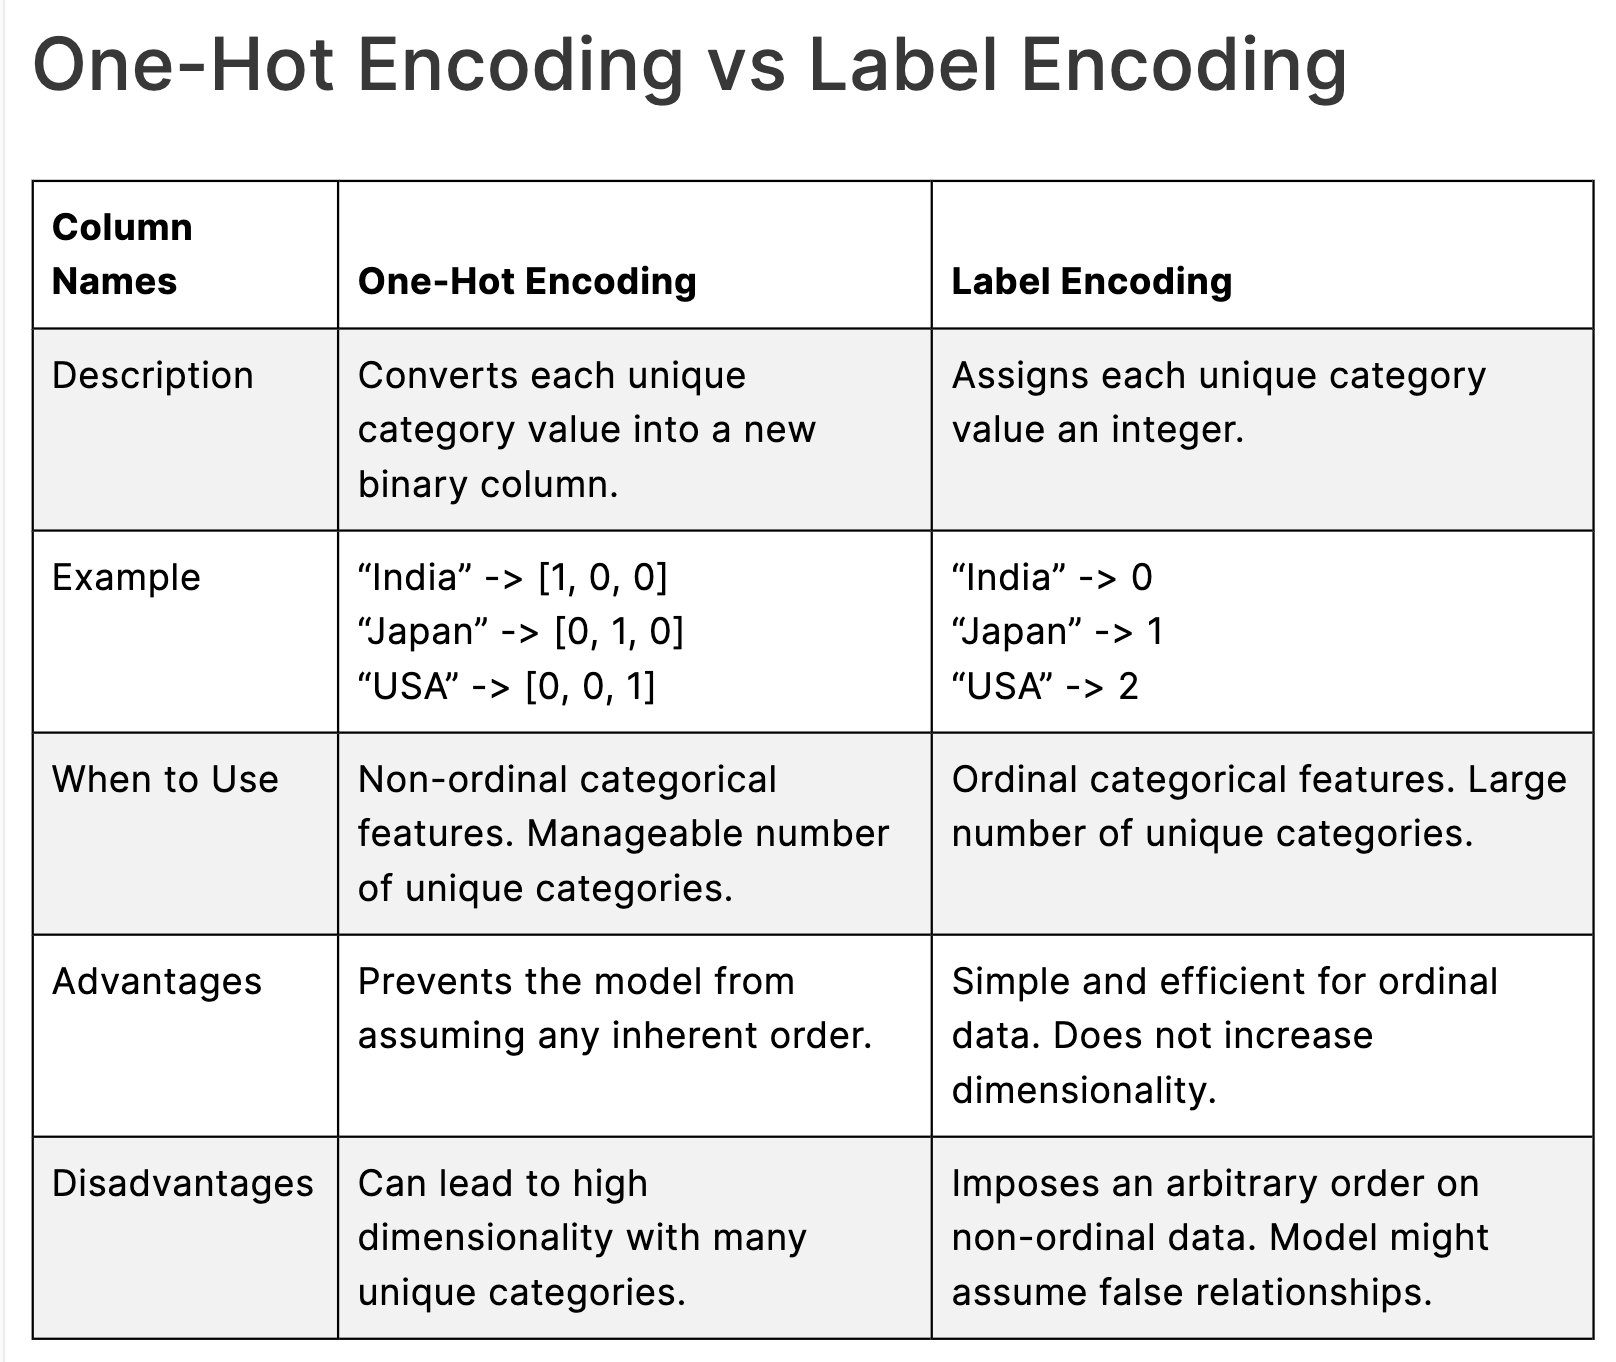

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [18]:
#Label Encoding will be used for columns with 2 or less unique values (e.g. Gender, Attrition, OverTime )
le = LabelEncoder()
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [19]:
#One-hot encoding
data = pd.get_dummies(data, drop_first=True)
data = data.astype(int) #make sure the table returns 0/1 not True/False

In [20]:
print(data.shape)
data.head()

(1470, 45)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


###Feature Scaling

Feature Scaling is used for normalization, ensuring that features contribute equally to the model's learning process.

For example, a variable with values in the range
0−10000 will dominate a variable in the range 0−10 during optimization. Therefore, scaling ensures all features are on a similar scale, so no single feature disproportionately influences the model.

In this dataset, **normalization** (MinMaxScaler) will be used to the shrinks the ranges in all variables into a consistent range from 0 to 5, ensuring better performance.

In [21]:
#import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
data_col = list(data.columns)
data_col.remove('Attrition')
for col in data_col:
    data[col] = data[col].astype(float)
    data[[col]] = scaler.fit_transform(data[[col]])
data['Attrition'] = pd.to_numeric(data['Attrition'], downcast = 'float')
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,1.666667,0.0,4.571429,3.333333,1.25,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,3.333333,5.0,2.214286,1.666667,1.25,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,5.000000,5.0,4.428571,1.666667,0.00,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,5.000000,0.0,1.857143,3.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.000000,5.0,0.714286,3.333333,0.00,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


###Splitting data into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
print(data.shape)
#Four redudant columns are removed in the previous step

(1470, 45)


In [24]:
#Assign the target variable to a new dataframe and convert it to a numeric variable
target = pd.DataFrame(data['Attrition'])
target = pd.to_numeric(target['Attrition'], downcast = 'float')
target.head()

,Attrition
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [25]:
#Remove the "Attrition" (aka target variable) from the dataset.
data.drop('Attrition', axis=1, inplace=True)
data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,3.579098,0.000000,1.25,1.666667,0.0,4.571429,3.333333,1.25,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.633500,1.250000,0.00,3.333333,5.0,2.214286,1.666667,1.25,1.666667,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,4.549034,0.178571,1.25,5.000000,5.0,4.428571,1.666667,0.00,3.333333,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,4.617037,0.357143,3.75,5.000000,0.0,1.857143,3.333333,0.00,3.333333,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,1.750179,0.178571,0.00,0.000000,5.0,0.714286,3.333333,0.00,1.666667,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [26]:
#Since we have class imbalance (more employees with attrition = 0 than attrition = 1), let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.25, random_state=7,stratify=target)

In [27]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 44)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


##Building Machine Learning Models

###Baseline Algorithms

At this step, the goal is to quickly **get a benchmark** for how well a given dataset can be modeled before investing time and effort into fine-tuning or applying advanced algorithms. A baseline algorithm is a simple and unoptimized machine learning model used as a **reference point** to evaluate the performance of more complex models.

In [28]:
#Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

Evaluate each model in turn

In [30]:
from sklearn import model_selection

In [31]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7, shuffle = True)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.64,6.43,76.51,4.36
1,Random Forest,80.03,5.55,85.12,2.86
2,SVM,77.63,5.71,84.30,2.66
5,Gaussian NB,75.11,5.02,66.33,4.99
3,KNN,66.22,5.32,84.67,2.33
4,Decision Tree Classifier,65.37,6.30,80.31,4.05


Random Forest and KNN have the highest classification accuracy mean values. However, relying solely on accuracy can often be misleading as accuracy is most suitable for balance classes while this dataset has imbalance classes. Therefore, it is essential to resort to another metric, in this case being **AUC**. As shown above, **Logistic Regression and Random Forest have the highest AUC mean values**. Therefore, these two algorithms will be shortlisted for further analysis.

###Logistic Regression

####Fit the model

In [32]:
#Fit the model into the training dataset
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle = True)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced",
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.82 (0.06)


####Fine-tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
#Fine-tuning the model
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced",
                                         random_state=7),
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_ #This is the fine-tuned model
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)


best params: LogisticRegression(C=0.10099999999999998, class_weight='balanced',
                   random_state=7, solver='liblinear')
best params: {'C': 0.10099999999999998}
best score: 0.8154962538233308


As shown above, the results from GridSearchCV provided us with fine-tuned hyperparameter that has the C of 0.1 and the AUC is 0.815.

In [35]:
from sklearn import metrics

####Evaluation

Text(50.722222222222214, 0.5, 'Actual')

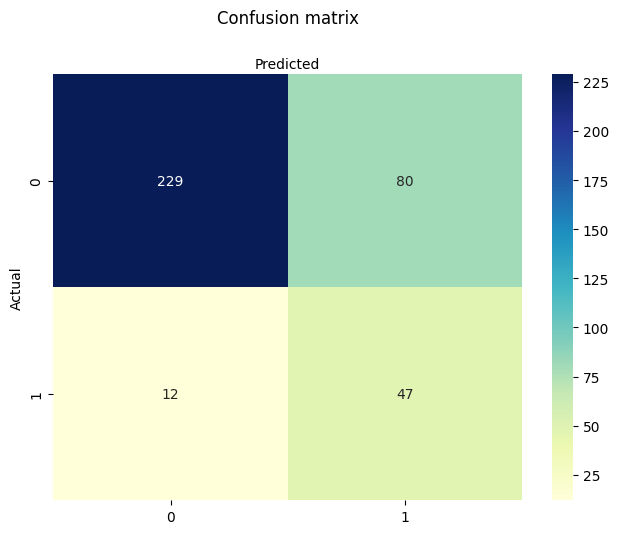

In [36]:
#Evaluation
##Confustion matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names =[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Predicted')
plt.ylabel('Actual')


Given 0 is "**Employee leaving**", and 1 is "**Employee staying**", we can interpret from the confustion matrix that:


*   229 employees who are predicted as leaving are actually leaving while **12 employees who are predicted as leaving are actually staying**.


*   **80 employees who are predicted as staying are actually leaving** while 47 employees who are predicted as staying are actually staying.





In [37]:
###Accuracy
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))


Accuracy of Logistic Regression Classifier on test set: 75.00


However, since this is the highly imbalanced dataset, the accuracy does not contribute much on interpreting the robustness of the model

In [38]:
from sklearn.metrics import classification_report

# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       309
         1.0       0.37      0.80      0.51        59

    accuracy                           0.75       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.75      0.78       368



Given 0 is "**Employee leaving**", it is interpreted that:

* 95% of the employees who are predicted as leaving are actually leaving
* 74% of the employees who are leaving are correctly identified. **This high percentage confirms that most at-risk employees are flagged**


In this case, focusing on the recall rate is more meaningful because it helps the company to correctly identify employees who are likely to leave. In other words, it helps avoid **false negative (actually leaving but predicted as staying)**



Given 1 is "**Employee staying**", it is interpreted that:

* Only 37% of employees who are predicted as staying are actually staying. This indicates that most of them are inaccurately predicted as staying while they are actually leaving. **Business-wise, this means some employees at risk of leaving are misclassified as staying, leading to missed retention opportunities**.


* 80% of employees who are actually staying are correctly identified, reducing unnecessary interventions for this group.


**Insight**

* High Precision for Class 0: The model rarely misclassifies employees as leaving when they are staying.

* Low Precision for Class 1: The model struggles to accurately predict employees staying, resulting in many false positives.

* High Recall for Class 1: The model identifies most employees staying but at the cost of low precision.

* Weighted Metrics: Overall metrics are skewed by the majority class (0), as reflected in the weighted average precision, recall, and F1-score.

In [39]:
from sklearn.metrics import roc_auc_score


In [40]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] #keep only the probabilities of "leaving" for each employee (each record)
print(probs)

[0.02248957 0.92368492 0.1150597  0.01783468 0.85791344 0.14030835
 0.8266589  0.44895742 0.56554436 0.97796802 0.2487545  0.06056176
 0.38982993 0.12337185 0.50766687 0.37243302 0.57565843 0.87411282
 0.64393008 0.14669332 0.16601654 0.7110938  0.74067672 0.22641985
 0.75670442 0.02227456 0.30473016 0.17472151 0.54428914 0.55955375
 0.58860773 0.41716386 0.50340553 0.69367969 0.7547536  0.06690699
 0.13851822 0.3192211  0.27999378 0.02698747 0.06013746 0.41173342
 0.11146233 0.24533876 0.81965857 0.26996947 0.78692527 0.77894278
 0.16510279 0.07048742 0.36779616 0.17973904 0.37603629 0.52038701
 0.47109697 0.43672197 0.15984065 0.05499358 0.76979843 0.87215325
 0.01668879 0.14404912 0.80502052 0.20016866 0.2288005  0.21804717
 0.50680547 0.21674389 0.17063165 0.97534533 0.78175423 0.09180308
 0.95337151 0.02041905 0.51289005 0.7780606  0.33090667 0.4399021
 0.35366565 0.42599829 0.28646354 0.01018429 0.58909781 0.96740992
 0.24570971 0.8294582  0.16173695 0.01058269 0.17537079 0.49686

For example, Employee 1 has probability of leaving at 2.2%, which could be categorised into "Employee staying". Employee 2 has it at 92,4%, which could be categorised into "At-risk employee".

In [41]:
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.857


The AUC score shows improvement with the fine-tuned model (higher than the best score during the optimisation step).



###Random Forest

Random Forest allows us to know which features are of the most importance in predicting the target feature.


####Fine-tuning

In [43]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=8, n_estimators=50, random_state=7)
best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 50}
best score: 0.7921334873360284


**Interpretation**

- class_weight = ' balanced': this parameter ensures the model pays more attention to the minority class (employees staying) as this is the imbalanced dataset


- max_depth = 10: limit the max depth of each DT in the forest to 10 --> control overfitting while preventing from being too complex


- min_samples_split = 8: ensure that a node must ahve at least 8 samples to be split further


- min_samples_leaf = 1: requires each leaf node (end node of a tree) has at least 1 sample


- n_estimators = 50: number of dt in the forest. In this case, 50 is the most optimal (too few may reduce model stability)

- best_score = 0.79: the highest ROC AUC score achieved during the grid search, indicating the model performs well yet has room for improvement.

####Feature Importance

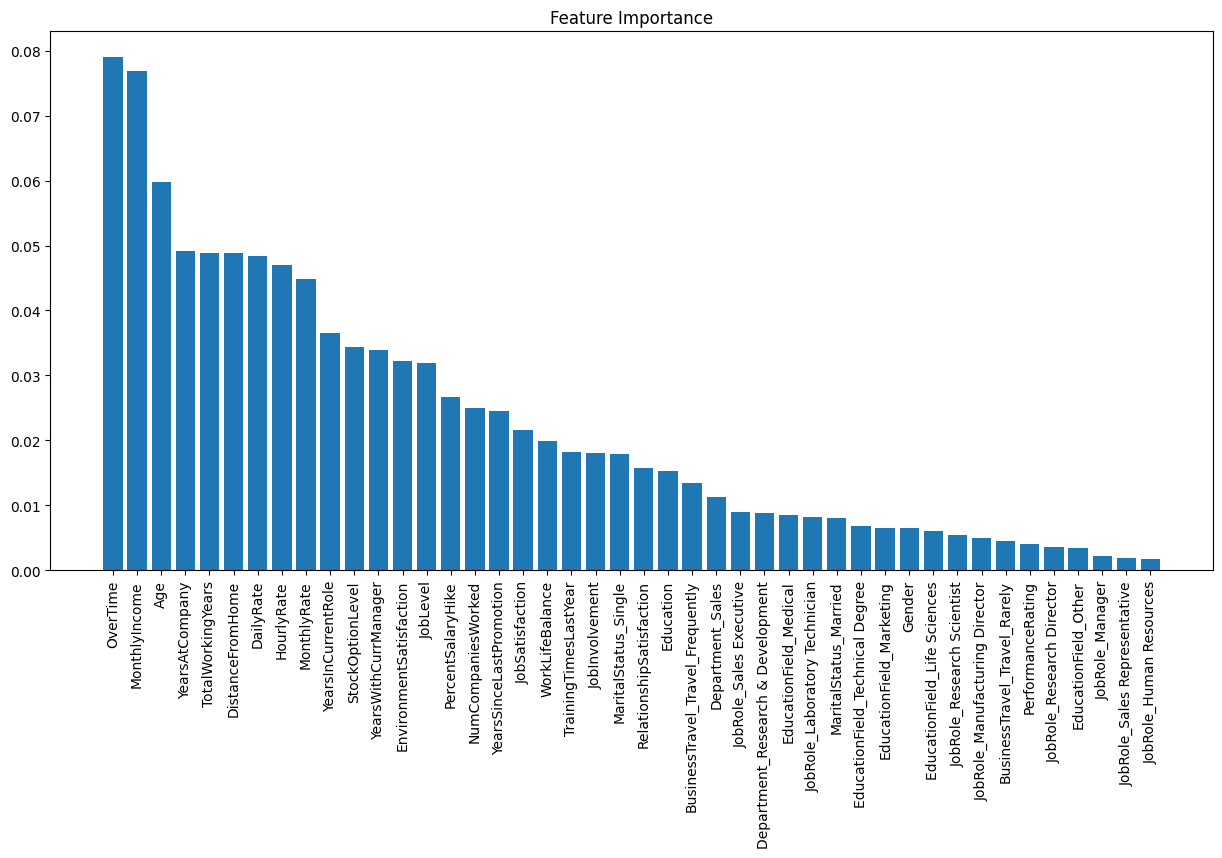

In [44]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

Overtime, MonthlyIncome, and Age are 3 most important features that affect the possibility of employees staying or leaving.

In [45]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,OverTime,0.079000
1,MonthlyIncome,0.076927
2,Age,0.059838
3,YearsAtCompany,0.049213
4,TotalWorkingYears,0.048843
5,DistanceFromHome,0.048774
6,DailyRate,0.048420
7,HourlyRate,0.047065
8,MonthlyRate,0.044778
9,YearsInCurrentRole,0.036472


The table shows top 10 most important indicators

####Evaluation

Text(0.5, 427.9555555555555, 'Predicted label')

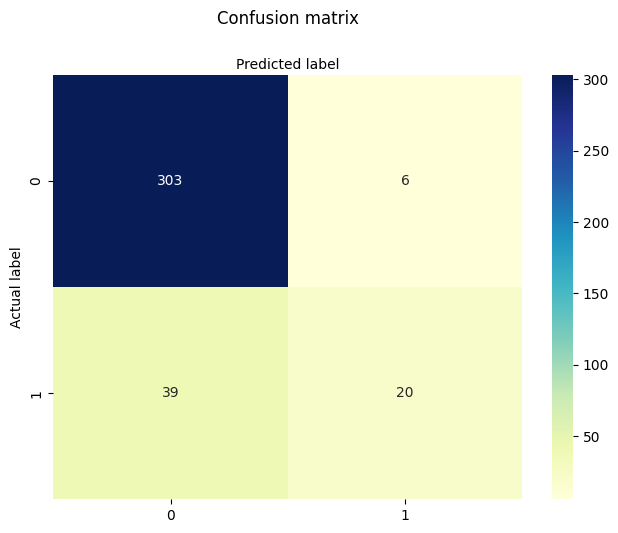

In [46]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))


Accuracy of RandomForest Regression Classifier on test set: 87.77


In [48]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       309
         1.0       0.77      0.34      0.47        59

    accuracy                           0.88       368
   macro avg       0.83      0.66      0.70       368
weighted avg       0.87      0.88      0.86       368



In [49]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.810


The resulting AUC score is higher than that best score during the optimisation step. Predicting probabilities of a particular label provides us with a measure of how likely an employee is to leave the company.



###ROC Chart

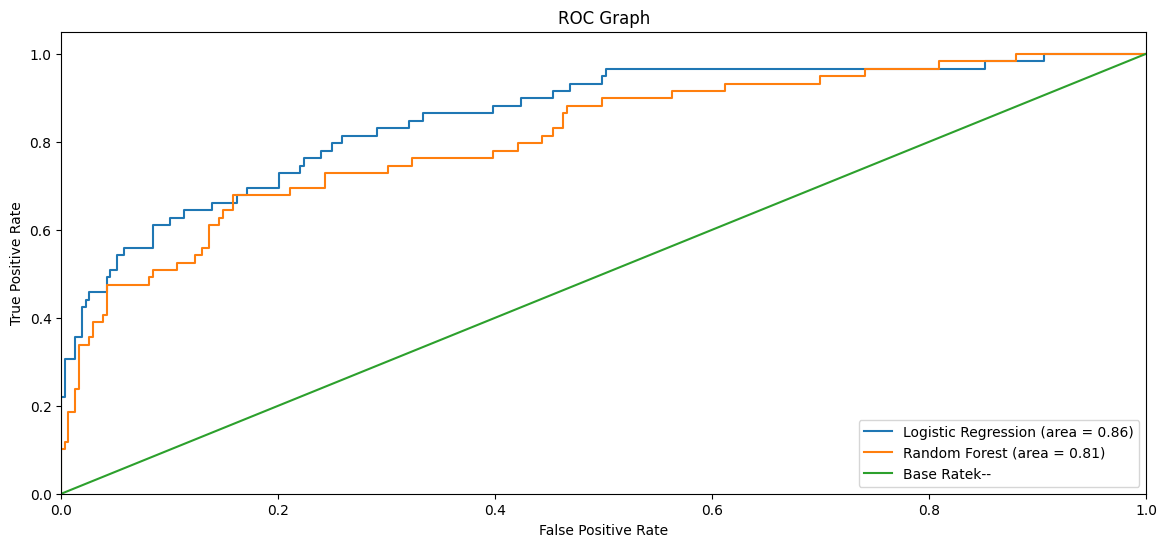

In [50]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

As shown above, the fine-tuned Logistic Regression model showed a higher AUC score compared to the Random Forest Classifier.



##Conclusion and Recommendation

###Employee segmentation

As the company generates more data on its employees (on New Joiners and recent Leavers) the algorithm can be re-trained using the additional data and theoritically generate more accurate predictions to identify high-risk employees of leaving based on the probabilistic label assigned by the algorithm.



Employees can be segmented into a "Risk Category" based on the probability assigned to them:

- Low risk: employees with probability < 0.5
- Medium risk: employees with probability between 0.5 and 0.7
- High risk: employees with probability > 0.7

###Strategic Retention Plan


The stronger indicators of people leaving include:

- **Monthly Income**: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.



- **Over Time**: people who work overtime are more likelty to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.



- **YearsWithCurrManager**: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year. Several metrics can be used here to determine whether action should be taken with a Line Manager:
    - number of employees under managers showing high turnover rates: this would indicate that the organisation's structure may need to be revisit to improve efficiency
    - number of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.



- **Age**: Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.


- **DistanceFromHome**: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.
TotalWorkingYears: The more experienced employees are less likely to leave. Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.


- **YearsAtCompany**: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.





A strategic "Retention Plan" should be specifically tailored to each Risk Category group. In addition to the suggested steps for each feature listed above, face-to-face meetings between a HR representative and employees can be initiated for medium- and high-risk employees to discuss work conditions. Also, a meeting with those employee's Line Manager would allow to discuss the work environment within the team and whether steps can be taken to improve it.